# Read Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/brad-book-review/BRAD.tsv' , sep="\t")


print(data.shape)

(510598, 5)


In [5]:
data.head()

,4,1682581870,57098525,13637412,صراع الجذور والانتماء، عقلة ساق الخيزان توائم نفسها وتنمو ايا كانت التربة. فكك الكاتب المجتمع الفلبيني والكويتي،غاص عميقا عميقا في تعقيداتهما معا،، رواية ممتعة.
0,5,1682385404,56693085,13637412,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,1682039752,30836455,13637412,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,1681553886,6680940,13637412,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,1681248984,19011044,13637412,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,1680848104,54035328,13637412,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [6]:

data.columns = ['label' , 'ID1' , 'ID2' , 'ID3' , 'sentence']
cleaned = data.drop(['ID1' , 'ID2' , 'ID3'], axis=1)
cleaned.head()

,label,sentence
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


# Dialect Detection

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("lafifi-24/arabicBert_arabic_dialect_identification" , model_max_length=512)
model = AutoModelForSequenceClassification.from_pretrained("lafifi-24/arabicBert_arabic_dialect_identification")
def detectDialect(review):
    
    encoding = tokenizer(review, return_tensors='pt', padding=True, truncation=True)
    output = model(**encoding)
    predictions = output.logits.argmax(dim=1)
    p = int(predictions)
    label_map={
    0:'EG',
    1:'SY',
    2:'PL',
    3:'KW',
    4:'LB',
    5:'LY',
    6:'JO',
    7:'DZ',
    8:'QA',
    9:'AE',
    10:'BH',
    11:'SA',
    12:'OM',
    13:'MA',
    14:'IQ',
    15:'TN',
    16:'SD',
    17:'YE',
    18:'MSA'}
    
    return label_map[p]

print(detectDialect("اللغة العربية هي لغة القرأن"))
print(detectDialect("صباح الفل يريس عايز واحد فول و واحد طعمية"))
print(detectDialect("شو بدك يا زلمة"))
print(detectDialect("واحد شاورما و كتر التومية تكرم يا معلم"))
print(detectDialect("اللي يعرف الصقر يشوية"))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

MSA
EG
LB
SY
KW


In [7]:
print("Duplicated values: " , cleaned.duplicated().sum())

cleaned.drop_duplicates(inplace=True)
cleaned = cleaned.dropna(axis=0)
print(cleaned.info())

Duplicated values:  5201
<class 'pandas.core.frame.DataFrame'>
Int64Index: 505397 entries, 0 to 510597
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   label     505397 non-null  int64 
 1   sentence  505397 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.6+ MB
None


In [20]:
subset2 = cleaned[:5000]
subset2.head()

,label,sentence
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [22]:
subset2["dialect"] = subset2['sentence'].apply(detectDialect)
subset2.head()

/tmp/ipykernel_33/1011902198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2["dialect"] = subset2['sentence'].apply(detectDialect)


,label,sentence,dialect
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,BH
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,BH
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,KW
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,AE
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,KW


In [23]:
subset2["dialect"].value_counts()

MSA    1403
KW      907
BH      746
EG      603
SA      181
OM      174
IQ      156
SD      130
YE      127
AE      110
DZ       88
LY       79
SY       68
MA       64
PL       53
TN       48
JO       35
LB       18
QA       10
Name: dialect, dtype: int64

In [11]:
subset = cleaned[10000:15000]
subset["dialect"] = subset['sentence'].apply(detectDialect)
subset.head()

/tmp/ipykernel_33/1037064859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["dialect"] = subset['sentence'].apply(detectDialect)


,label,sentence,dialect
10054,5,بمجرد أن انتهيت من قراءتها، تمنيت زيارة اسباني...,MSA
10055,4,و أخيرا ،، هذا الكتاب هو سلسلة من الحيوات لعائ...,MSA
10056,5,ما أشبه هذه الرواية بالتاريخ، الشخص الذي تعلقت...,MSA
10057,5,مش عارفة أحدد بالظبط ايه الي مخلي الكتاب دا من...,EG
10058,2,ساعات بنسى انا ليه مش بحب اقرا الروايات العربي...,EG


In [17]:
subset["dialect"].value_counts()

MSA    1979
EG     1050
BH      343
SD      207
LY      165
SA      163
IQ      159
OM      141
YE      124
DZ      107
KW      105
SY       99
MA       95
PL       74
AE       71
TN       62
QA       24
JO       20
LB       12
Name: dialect, dtype: int64

In [32]:
subset3 = cleaned[450000:455000]
subset3["dialect"] = subset3['sentence'].apply(detectDialect)
subset3.head()

/tmp/ipykernel_33/795293320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3["dialect"] = subset3['sentence'].apply(detectDialect)


,label,sentence,dialect
454548,3,الرواية تتحدث عن الأحداث السياسية في العهد الذ...,MSA
454549,1,الرواية هتنافس على قمة اسواء روايات السلسله با...,EG
454550,5,كاتي ديد كاتي ديد :D,MA
454551,3,وجبة خفيفة سريعة الهضم مليئة بالفيتامينات... م...,MSA
454552,4,الكثير من المتعة.. القراءة للعراب شئ عظيم جدا....,MA


In [36]:
subset4 = cleaned[350000:355000]
subset4["dialect"] = subset4['sentence'].apply(detectDialect)
subset4.head()

/tmp/ipykernel_33/1796669721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset4["dialect"] = subset4['sentence'].apply(detectDialect)


,label,sentence,dialect
353407,5,مؤلمة الم واقعنا,DZ
353408,3,خرج عن المؤلف في روايته في اختلاق الشخصيات وطر...,MSA
353409,4,المتشائل الكتاب الذي حدثني عنه والدي كثيرا وكا...,MSA
353410,3,ليستْ كما سمعت عنها!. :),MSA
353411,5,الوقائع الغريبة في اختفاء سعيد أبي النحس المتش...,MSA


In [37]:
sample = [subset , subset2 , subset3 , subset4]
sample = pd.concat(sample)
sample.head()

,label,sentence,dialect
10054,5,بمجرد أن انتهيت من قراءتها، تمنيت زيارة اسباني...,MSA
10055,4,و أخيرا ،، هذا الكتاب هو سلسلة من الحيوات لعائ...,MSA
10056,5,ما أشبه هذه الرواية بالتاريخ، الشخص الذي تعلقت...,MSA
10057,5,مش عارفة أحدد بالظبط ايه الي مخلي الكتاب دا من...,EG
10058,2,ساعات بنسى انا ليه مش بحب اقرا الروايات العربي...,EG


In [38]:
sample["dialect"].value_counts()

MSA    7045
EG     3746
BH     1943
KW     1415
SA      816
IQ      744
OM      665
SD      626
YE      486
LY      433
AE      419
SY      360
MA      302
DZ      281
PL      244
TN      199
JO      154
LB       70
QA       52
Name: dialect, dtype: int64

In [39]:
training_df = pd.concat([sample], axis=1)
training_df.to_csv('sample20.csv', encoding='utf-8', index=False)

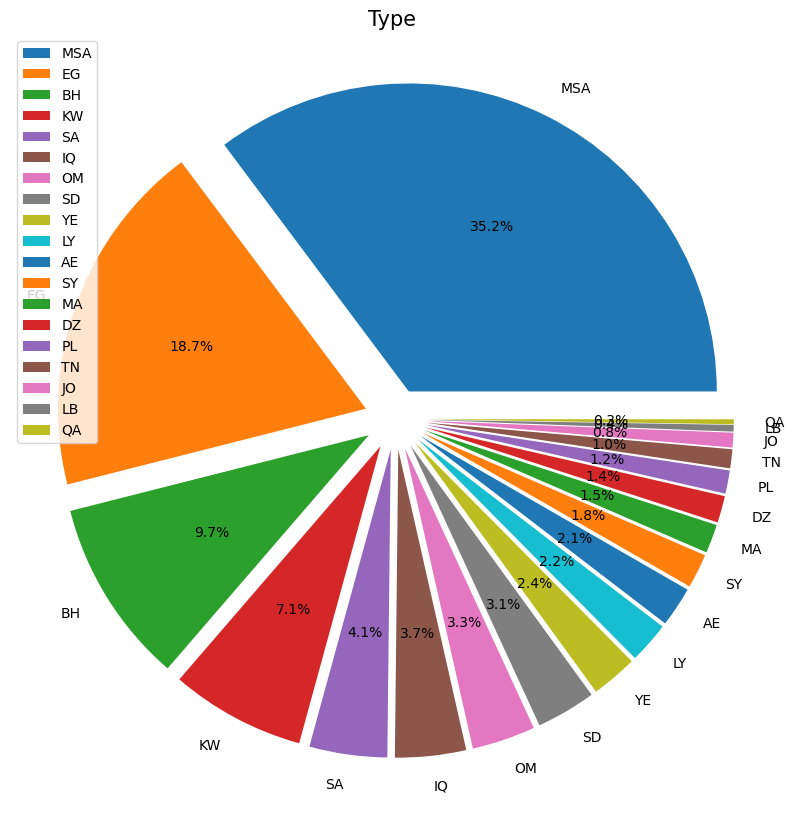

In [40]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=["MSA","EG","BH","KW" , "SA","IQ", "OM", "SD","YE","LY","AE","SY","MA","DZ","PL","TN","JO","LB","QA"]
plt.pie(sample["dialect"].value_counts(),explode =(0.1,0.1,0.1 , 0.1,0.1,0.1 , 0.1,0.1,0.1 ,  0.1,0.1,0.1 , 0.1,0.1,0.1 , 0.1,0.1,0.1 , 0.1 ), labels=labels,autopct='%1.1f%%')
plt.title('Type ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

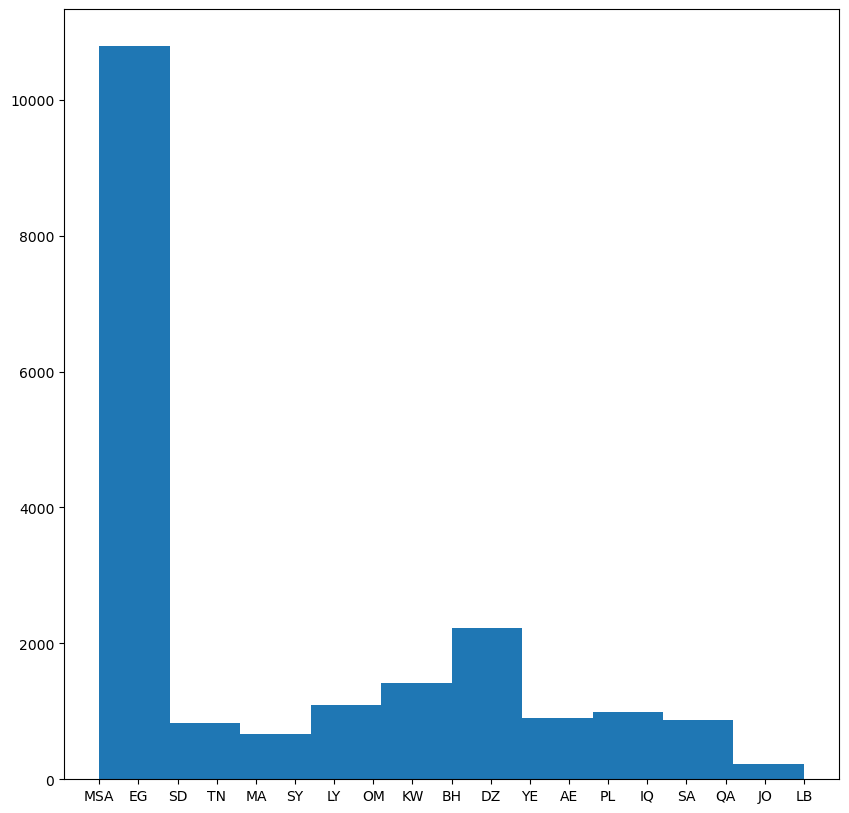

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = sample["dialect"]


plt.hist(x )
plt.show() 